# LitNFFs
* This notebook shows how to speed up [Neural Force Field](https://github.com/learningmatter-mit/NeuralForceField) model training on [MD17](https://www.science.org/doi/10.1126/sciadv.1603015) datasets using the LitMatter template.  
* The training workflow shown here can be scaled to hundreds of GPUs by changing a single keyword argument!

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import nff
import torch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pytorch_lightning as pl

In [3]:
%matplotlib inline

In [7]:
from lit_data.nff_data import NFFDataModule

# change to point to the NeuralForceField repo
dm = NFFDataModule(path='../../NeuralForceField/tutorials/data/dataset.pth.tar',
                  batch_size=8)
dm.prepare_data()
dm.setup()

In [8]:
mean_energy = dm.train_dataset.props['energy'].mean().item()
std_energy = dm.train_dataset.props['energy'].std().item()

In [23]:
from lit_models.lit_nffs import LitNFF

model_params = {
    'model_type': 'SchNet',
    'n_atom_basis': 128,
    'n_filters': 128,
    'n_gaussians': 32,
    'n_convolutions': 4,
    'cutoff': 5.0,
    'trainable_gauss': True,
    'dropout_rate': 0.2
}


loss_params = {'energy': 0.05, 'energy_grad': 0.95
              }

model = LitNFF(model_params, loss_params, lr=3e-4)

In [24]:
trainer = pl.Trainer(gpus=-1,  # use all available GPUs on each node
#                   num_nodes=1,  # change to number of available nodes
#                  accelerator='ddp',
                 max_epochs=100,
                 )

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [25]:
trainer.fit(model, datamodule=dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [GPU-13636255-d3c9-b0ac-83c7-b25c82e0dbc5]
Set SLURM handle signals.

  | Name  | Type   | Params
---------------------------------
0 | model | SchNet | 240 K 
---------------------------------
240 K     Trainable params
0         Non-trainable params
240 K     Total params
0.963     Total estimated model params size (MB)
/home/gridsan/NA30490/.conda/envs/nff/lib/python3.7/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:617: UserWarning: Checkpoint directory /home/gridsan/NA30490/litmatter_dev/litmatter/lightning_logs/version_48690281/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/home/gridsan/NA30490/.conda/envs/nff/lib/python3.7/site-packages/pytorch_lightning/core/datamodule.py:470: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  f"DataModule.{name} has already been called, so it will not be called again. "


In [26]:
metrics = trainer.validate(model, datamodule=dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [GPU-13636255-d3c9-b0ac-83c7-b25c82e0dbc5]


Validating: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_loss': 14.770734786987305}
--------------------------------------------------------------------------------


In [27]:
results = trainer.predict(model, dataloaders=[dm.val_dataloader()])

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [GPU-13636255-d3c9-b0ac-83c7-b25c82e0dbc5]


Predicting: 75it [00:00, ?it/s]

In [28]:
y_energy = [r['energy'] for r in results]

In [29]:
y_force = [r['energy_grad'] for r in results]

In [30]:
results = {'energy': torch.cat(y_energy).view(-1), 'energy_grad': torch.cat(y_force).view(-1)}

In [31]:
yhat_energy, yhat_force = dm.val_dataset[:]['energy'], dm.val_dataset[:]['energy_grad']

In [32]:
targets = {'energy_grad': torch.cat(yhat_force).view(-1), 'energy': yhat_energy}

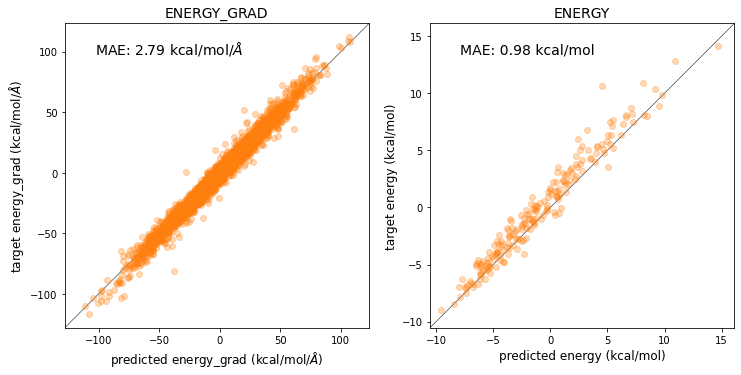

In [33]:
units = {
    'energy_grad': r'kcal/mol/$\AA$',
    'energy': 'kcal/mol'
}

fig, ax_fig = plt.subplots(1, 2, figsize=(12, 6))

for ax, key in zip(ax_fig, units.keys()):
#     pred = torch.stack(results[key], dim=0).view(-1).detach().cpu().numpy()
#     targ = torch.stack(targets[key], dim=0).view(-1).detach().cpu().numpy()
    pred = results[key].detach().numpy()
    targ = targets[key].numpy()
    mae = abs(pred-targ).mean()

    ax.scatter(pred, targ, color='#ff7f0e', alpha=0.3)
    
    lim_min = min(np.min(pred), np.min(targ)) * 1.1
    lim_max = max(np.max(pred), np.max(targ)) * 1.1
    
    ax.set_xlim(lim_min, lim_max)
    ax.set_ylim(lim_min, lim_max)
    ax.set_aspect('equal')
    
    ax.plot((lim_min, lim_max),
            (lim_min, lim_max),
            color='#000000',
            zorder=-1,
            linewidth=0.5)
    
    ax.set_title(key.upper(), fontsize=14)
    ax.set_xlabel('predicted %s (%s)' % (key, units[key]), fontsize=12)
    ax.set_ylabel('target %s (%s)' % (key, units[key]), fontsize=12)
    ax.text(0.1, 0.9, 'MAE: %.2f %s' % (mae, units[key]), 
           transform=ax.transAxes, fontsize=14)
    
plt.show()